# SPACEc: Patch proximity analysis

Patch proximity analysis (PPA) analyses neighborhoods as patches of closely connected cells. The goal of the analysis is to analyze was surrounds these patches within a user defined radius. In our example we will use PPA to identify germinal centers as CN patches and then analyze was surrounds them based on the tissue condition (tonsil vs. tonsillitis). 

### Set up environment

In [1]:
# import spacec
import spacec as sp

#import standard packages
import os
import scanpy as sc

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

INFO:root: * TissUUmaps version: 3.1.1.6
/home/tim/miniforge3/envs/spacec/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/tim/miniforge3/envs/spacec/lib/python3.9/site-packages/cudf/utils/gpu_utils.py:89: UserWarning: A GPU with NVIDIA Volta™ (Compute Capability 7.0) or newer architecture is required.
Detected GPU 0: NVIDIA GeForce GTX 1070                                                                                                                                                                                                                                         
Detected Compute Capability: 6.1
  warnings.warn(


In [2]:
root_path = "/home/user/path/SPACEc/" # inset your own path

data_path = root_path + 'data/' # where the data is stored

# where you want to store the output
output_dir = root_path + '_outs/'
os.makedirs(output_dir, exist_ok=True)

In [3]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [4]:
adata = sc.read(output_dir + 'adata_nn_demo_annotated.h5ad')
adata

AnnData object with n_obs × n_vars = 46789 × 59
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse', 'cell_type_coarse_subcluster', 'cell_type_coarse_f', 'cell_type_coarse_f_subcluster', 'cell_type_coarse_f_f', 'cell_type', 'CN_k20_n40', 'CN_k20_n30', 'CN_k20_n20', 'CN_k20_n25', 'CN_k20_n6', 'CN_k20_n6_annot'
    uns: 'CN_k20_n6_colors', 'Centroid_k20_n20', 'Centroid_k20_n25', 'Centroid_k20_n30', 'Centroid_k20_n40', 'Centroid_k20_n6', 'cell_type_coarse_f_colors', 'cell_type_colors', 'dendrogram_cell_type_coarse_f_subcluster', 'leiden', 'leiden_1_colors', 'neighbors', 'ppa_result_100', 'ppa_result_150', 'ppa_result_200', 'ppa_result_250', 'ppa_result_50', 'triDist', 'triDist_keyname', 'umap', 'unique_region_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

Setting the plotting parameter to True illustrates what the PPA function is detecting. This might be helpful if the min cluster size is unknown or the user wants to perform quality control. The results are stored as df in the adata.uns slot.

Estimated number of clusters: 4
Estimated number of noise points: 7


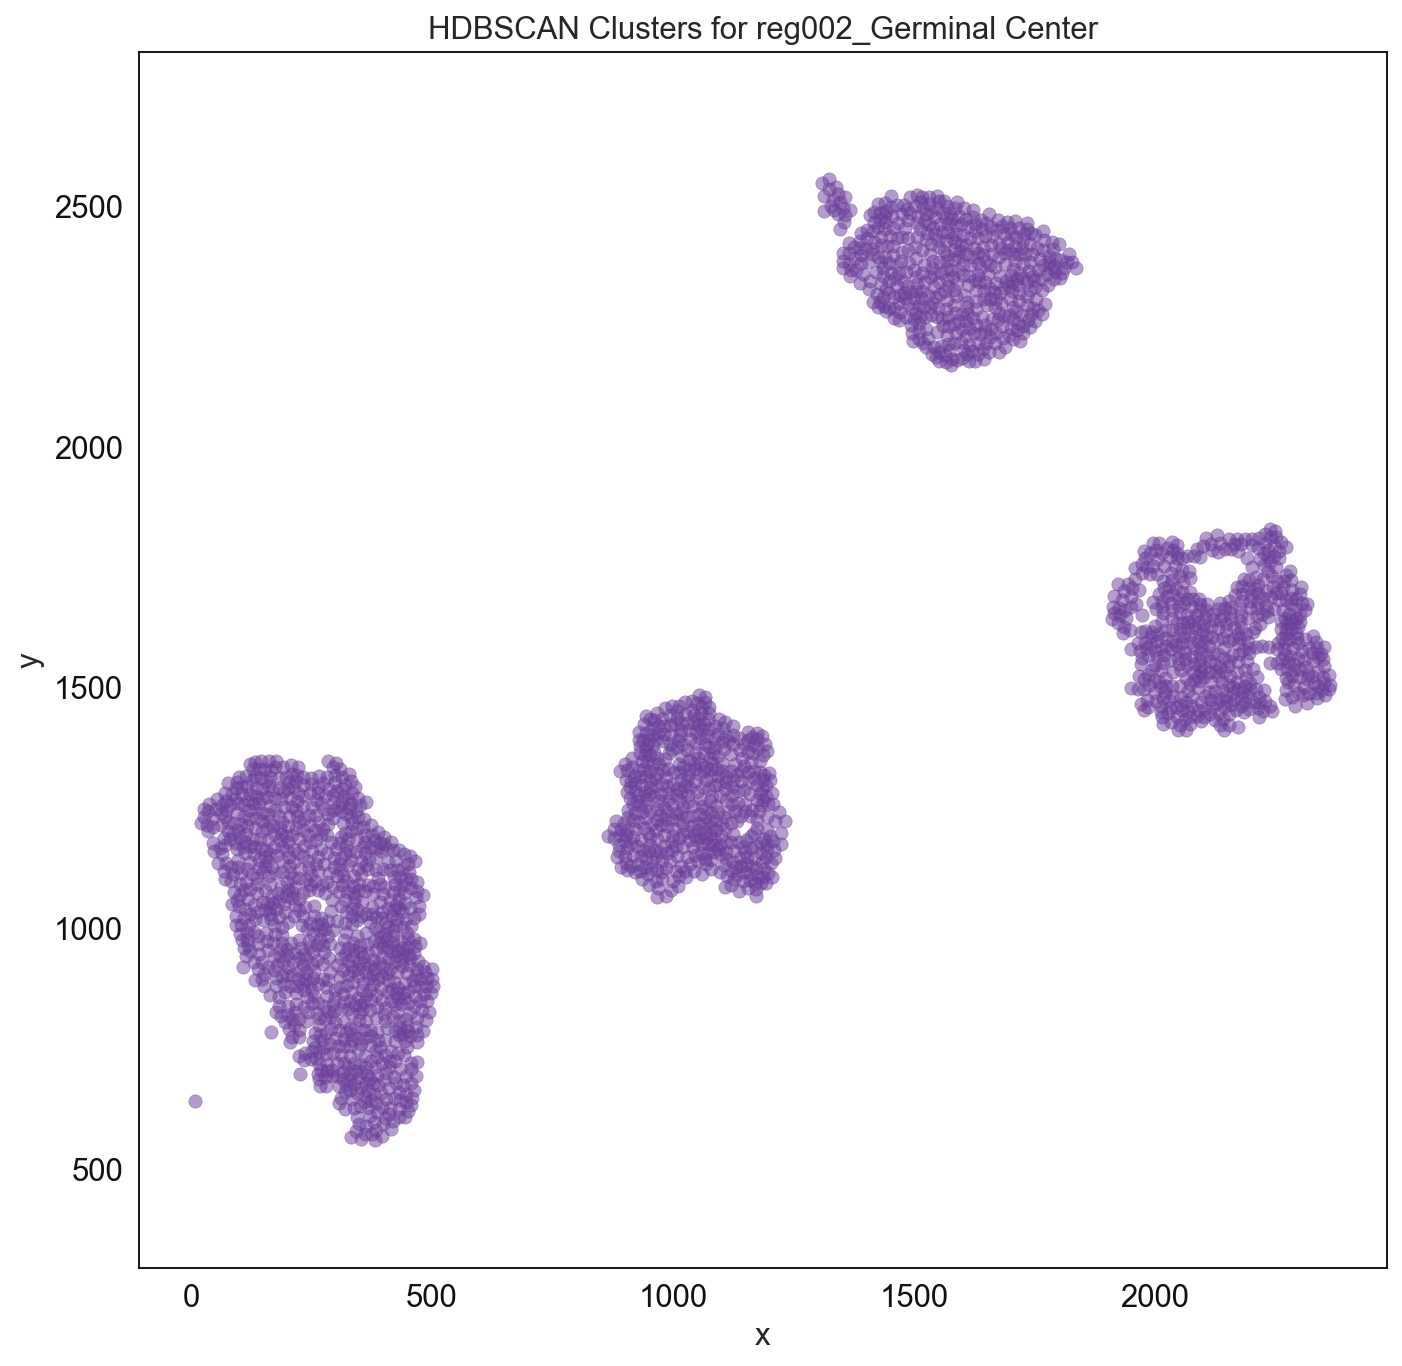

Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1


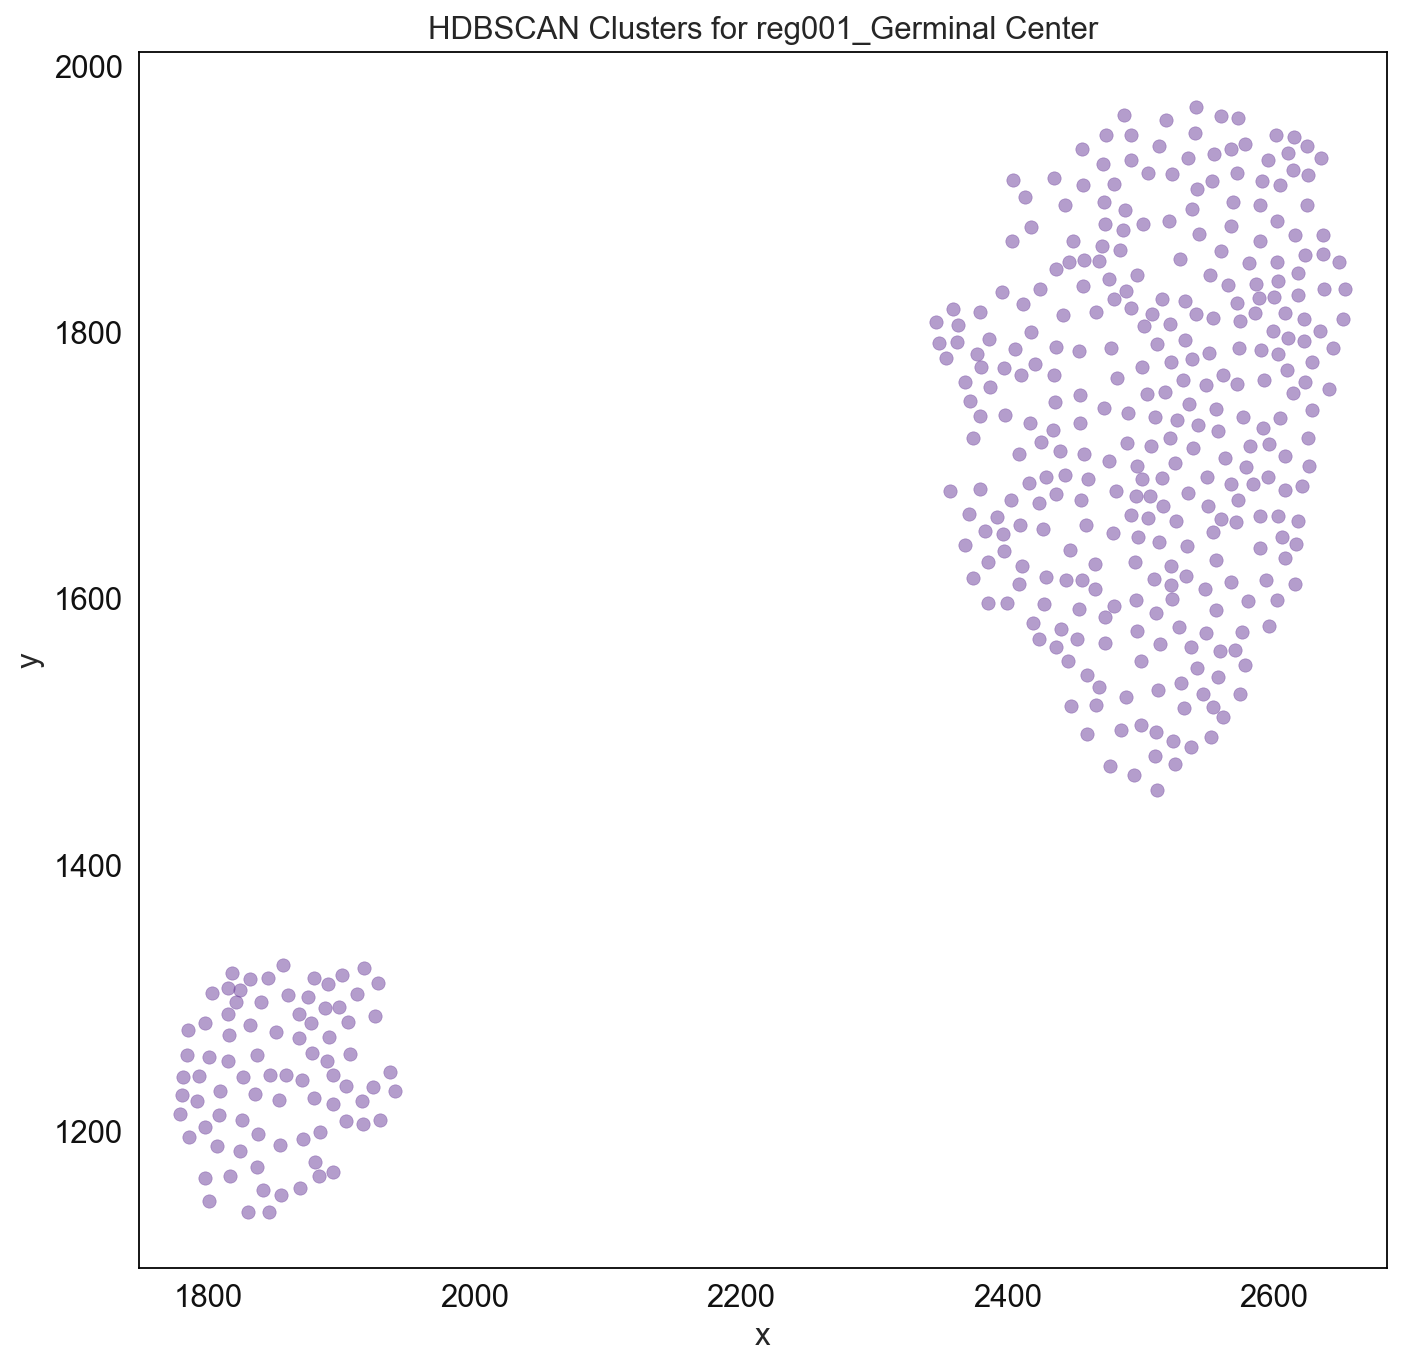

Finished reg001_Germinal Center


In [8]:
# this region result is also saved to adata.uns
region_results = sp.tl.patch_proximity_analysis(
    adata, 
    region_column = "unique_region", # column with the region information
    patch_column = "CN_k20_n6_annot", # column with the patch information (derive patches from this column)
    group="Germinal Center", # group to consider
    min_cluster_size=50, # minimum cluster size to consider
    x_column='x', y_column='y', # spatial coordinates
    radius = (5/0.5085), # to get the distance in µm
    edge_neighbours = 3, # number of neighbours to consider for edge detection
    key_name = 'ppa_result_5', # key name to store the result in adata.uns
    plot = True) # plot detection for demonstration purposes

In [9]:
region_results

(         DAPI            x            y   area region_num unique_region  \
 0  121.210000  2176.510000  1814.550000  100.0          1        reg002   
 2  117.117021  1995.148936  1462.212766   94.0          1        reg002   
 0  129.582524  2429.368932  1558.776699  103.0          0        reg001   
 
      condition leiden_1 leiden_1_subcluster cell_type_coarse  ...  \
 0  tonsillitis        6                 6,0              GCB  ...   
 2  tonsillitis       15                15,1           B cell  ...   
 0       tonsil       15                15,1           B cell  ...   
 
   cell_type_coarse_f_f cell_type CN_k20_n40 CN_k20_n30 CN_k20_n20  CN_k20_n25  \
 0                  GCB       GCB          1          1          1           1   
 2               B cell    B cell          1          1          1           1   
 0               B cell    B cell          1          1          1           1   
 
    CN_k20_n6  CN_k20_n6_annot  patch_id                  unique_patch_ID  
 0    

Often it is more informative to derive the cellular content within a range of distances.

In [6]:
pixel_to_um = 0.5085 # conversion factor from pixel to µm
distances = [5/pixel_to_um, 10/pixel_to_um, 15/pixel_to_um, 20/pixel_to_um, 25/pixel_to_um] # distances in µm
key_names = ['ppa_result_5', 'ppa_result_10', 'ppa_result_15', 'ppa_result_20', 'ppa_result_25'] # key names to store the results

for distance, key_name in zip(distances, key_names): # loop over distances and key names
    # this region result is also saved to adata.uns
    region_results = sp.tl.patch_proximity_analysis(
        adata, 
        region_column = "unique_region", 
        patch_column = "CN_k20_n6_annot", 
        group="Germinal Center",
        min_cluster_size=50, 
        x_column='x', y_column='y', 
        radius = distance, # to get the distance in µm
        edge_neighbours = 3,
        key_name = key_name,
        plot = False)

Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center
Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center
Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center
Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center
Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center


In [10]:
# save adata
adata.write(output_dir + 'adata_nn_demo_annotated_cn.h5ad')

... storing 'region_num' as categorical
... storing 'unique_region' as categorical
... storing 'condition' as categorical
... storing 'leiden_1' as categorical
... storing 'leiden_1_subcluster' as categorical
... storing 'cell_type_coarse' as categorical
... storing 'cell_type_coarse_subcluster' as categorical
... storing 'cell_type_coarse_f' as categorical
... storing 'cell_type_coarse_f_subcluster' as categorical
... storing 'cell_type_coarse_f_f' as categorical
... storing 'cell_type' as categorical
... storing 'CN_k20_n6_annot' as categorical


SPACEc can visualize the PPA results as donut plot showing the percentages of cell types or CNs within a given radius around the patches. Percentages are averaged over all regions in the selected condition. The donut plot can show up to five distances.

Key 0: ppa_result_25
Key 0 has 1720 rows.
Key 1: ppa_result_20
Key 1 has 1271 rows.
Key 2: ppa_result_15
Key 2 has 850 rows.
Key 3: ppa_result_10
Key 3 has 456 rows.
Key 4: ppa_result_5
Key 4 has 3 rows.


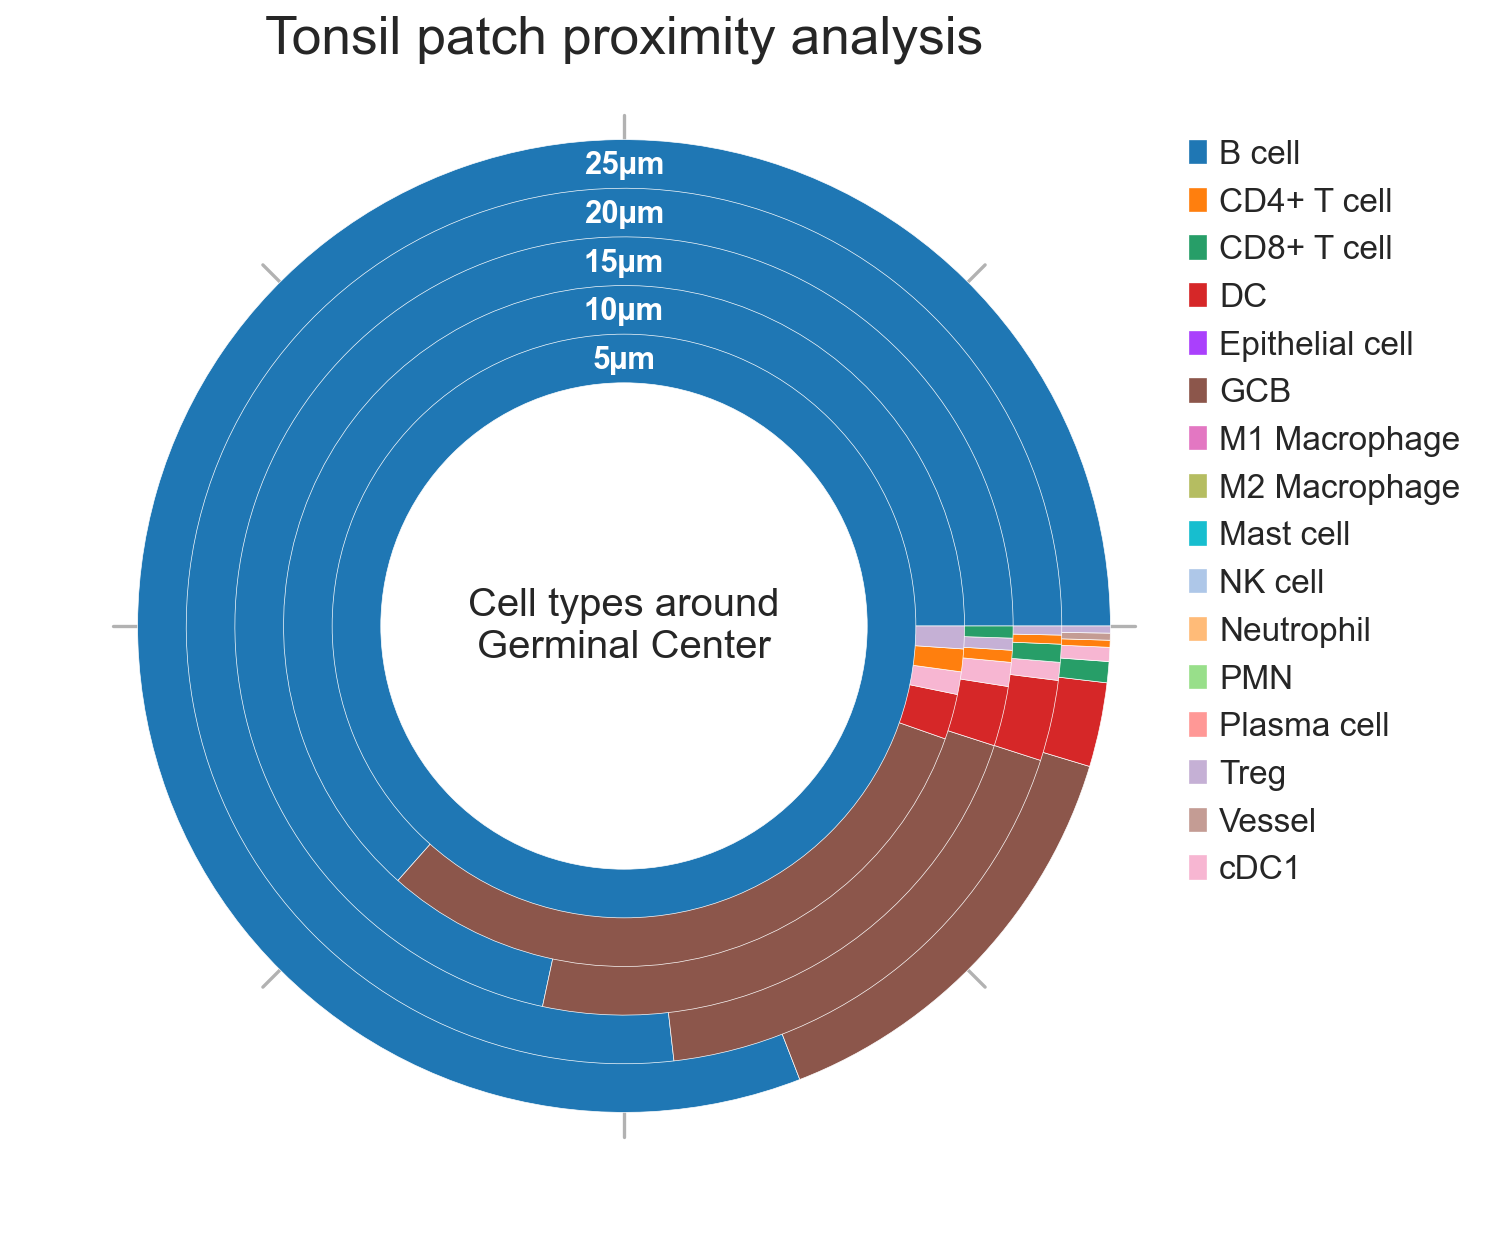

Key 0: ppa_result_25
Key 0 has 1720 rows.
Key 1: ppa_result_20
Key 1 has 1271 rows.
Key 2: ppa_result_15
Key 2 has 850 rows.
Key 3: ppa_result_10
Key 3 has 456 rows.
Key 4: ppa_result_5
Key 4 has 3 rows.


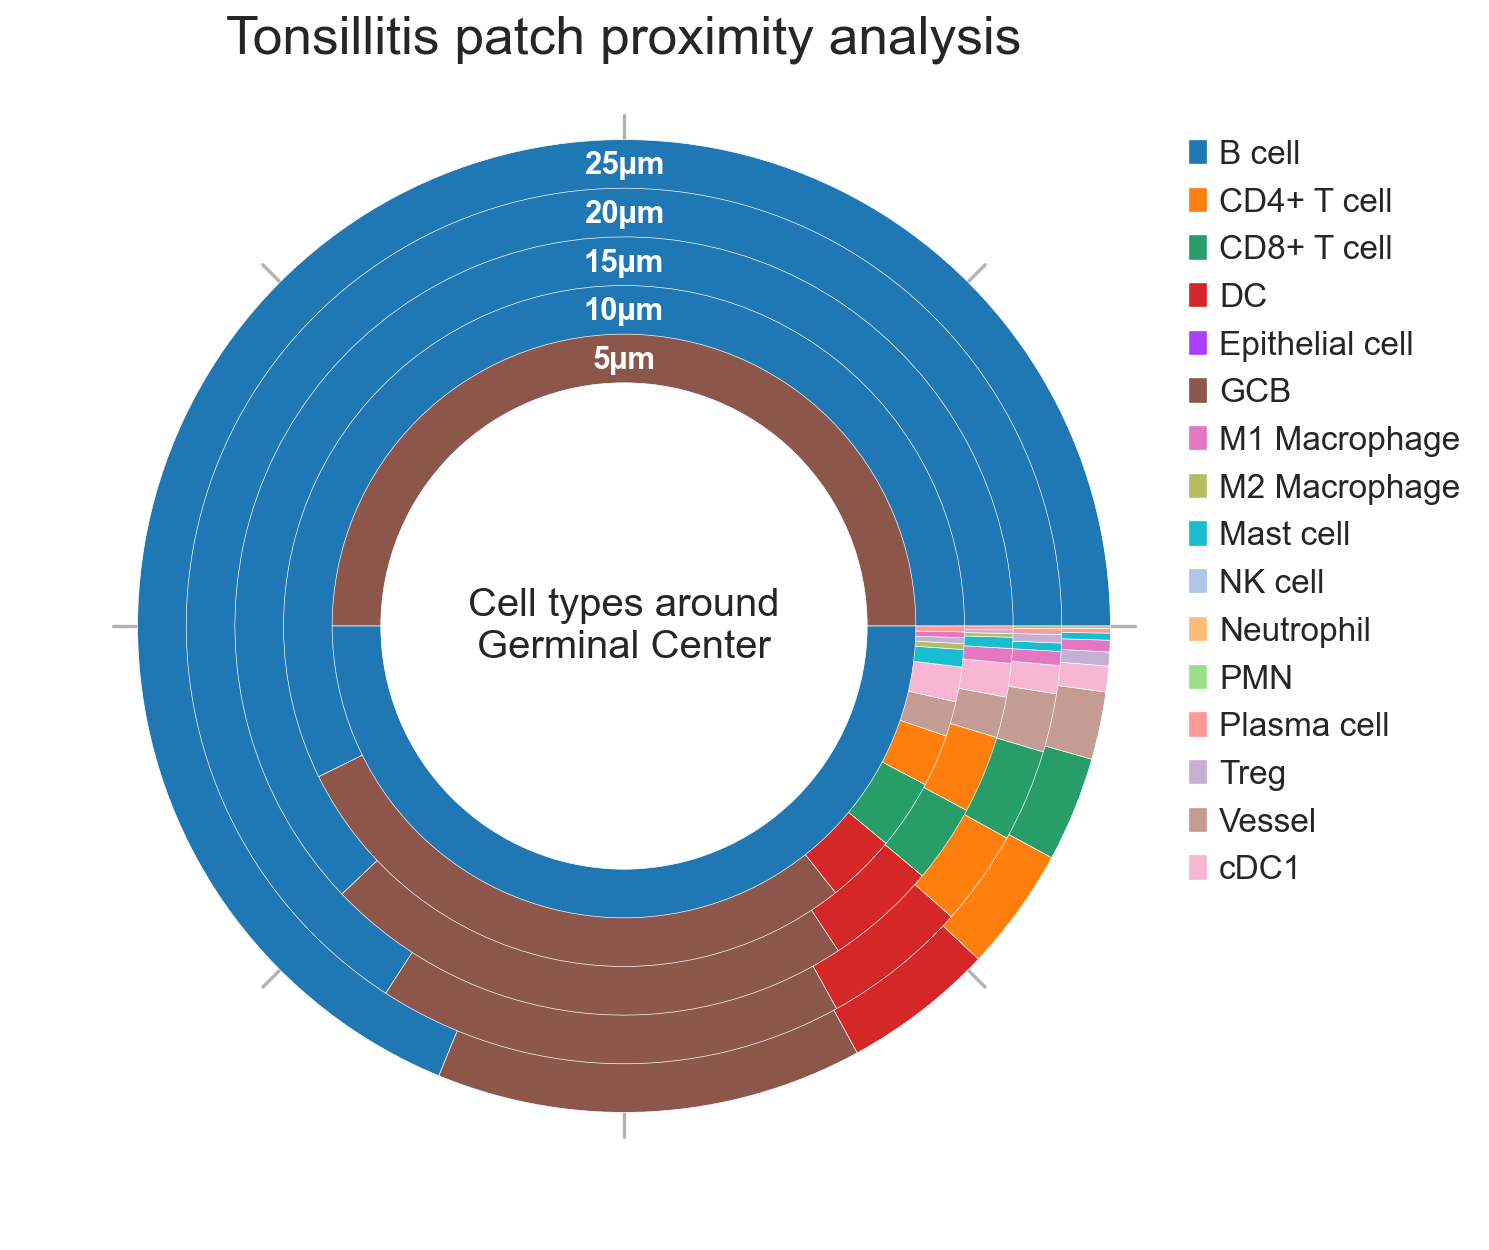

In [15]:
# Donut plots for cell types around Germinal Center
sp.pl.ppa_res_donut(adata, 
                palette=None, # color palette
                cat_col = "cell_type", # column with the cell type or CN information
                key_names = ['ppa_result_5', 'ppa_result_10', 'ppa_result_15', 'ppa_result_20', 'ppa_result_25'], # key names to plot
                radii = [5, 10, 15, 20, 25], # radii in µm
                unit = 'µm', # unit
                figsize = (10,10), # figure size
                add_guides = True, # add guides
                text = 'Cell types around Germinal Center', # text to display in the middle
                label_color='white', # distance label color
                subset_column = 'condition', # column to subset
                subset_condition = 'tonsil', # condition to subset
                title='Tonsil patch proximity analysis') # title

sp.pl.ppa_res_donut(adata, 
                palette=None,
                cat_col = "cell_type",
                key_names = ['ppa_result_5', 'ppa_result_10', 'ppa_result_15', 'ppa_result_20', 'ppa_result_25'],
                radii = [5, 10, 15, 20, 25],
                unit = 'µm',
                figsize = (10,10),  
                add_guides = True,
                text = 'Cell types around Germinal Center',
                label_color='white',
                subset_column = 'condition',
                subset_condition = 'tonsillitis',
                title='Tonsillitis patch proximity analysis')

Key 0: ppa_result_25
Key 0 has 1720 rows.
Key 1: ppa_result_20
Key 1 has 1271 rows.
Key 2: ppa_result_15
Key 2 has 850 rows.
Key 3: ppa_result_10
Key 3 has 456 rows.
Key 4: ppa_result_5
Key 4 has 3 rows.


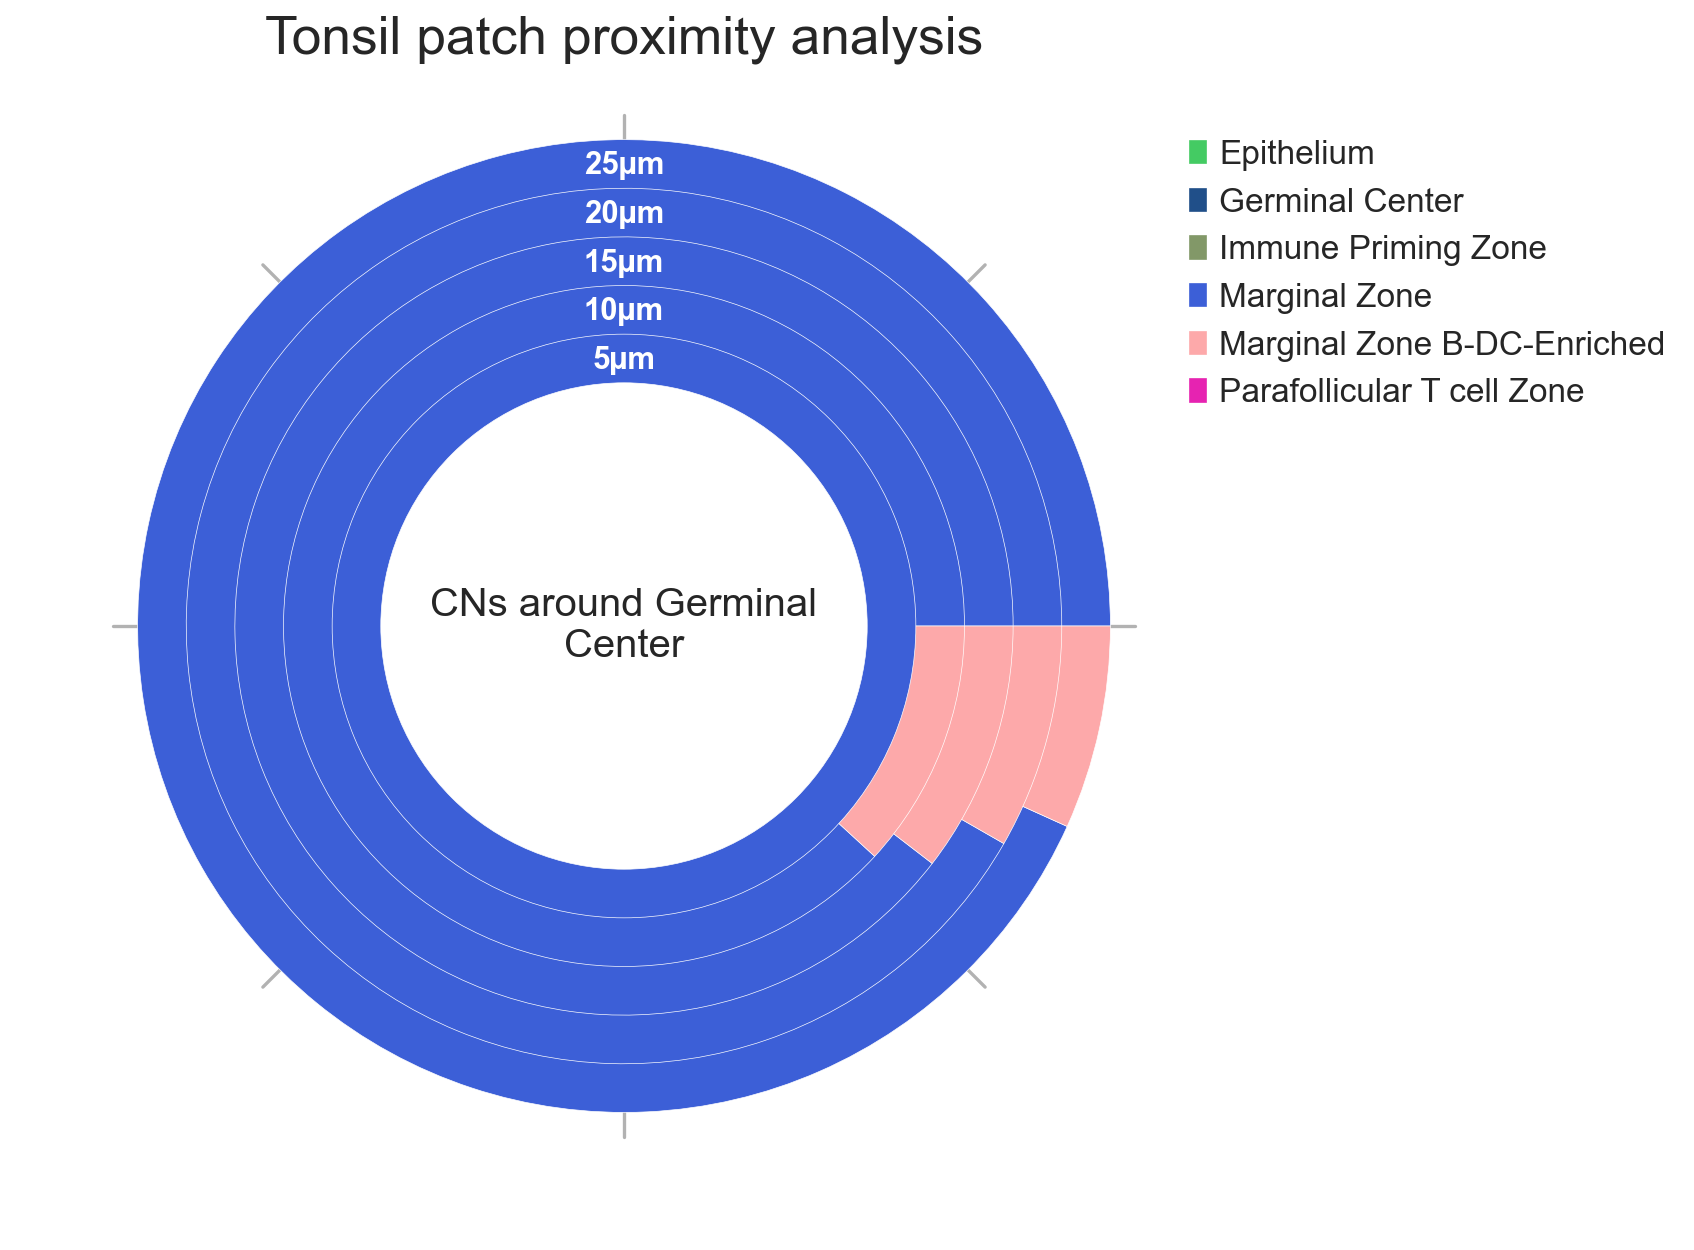

Key 0: ppa_result_25
Key 0 has 1720 rows.
Key 1: ppa_result_20
Key 1 has 1271 rows.
Key 2: ppa_result_15
Key 2 has 850 rows.
Key 3: ppa_result_10
Key 3 has 456 rows.
Key 4: ppa_result_5
Key 4 has 3 rows.


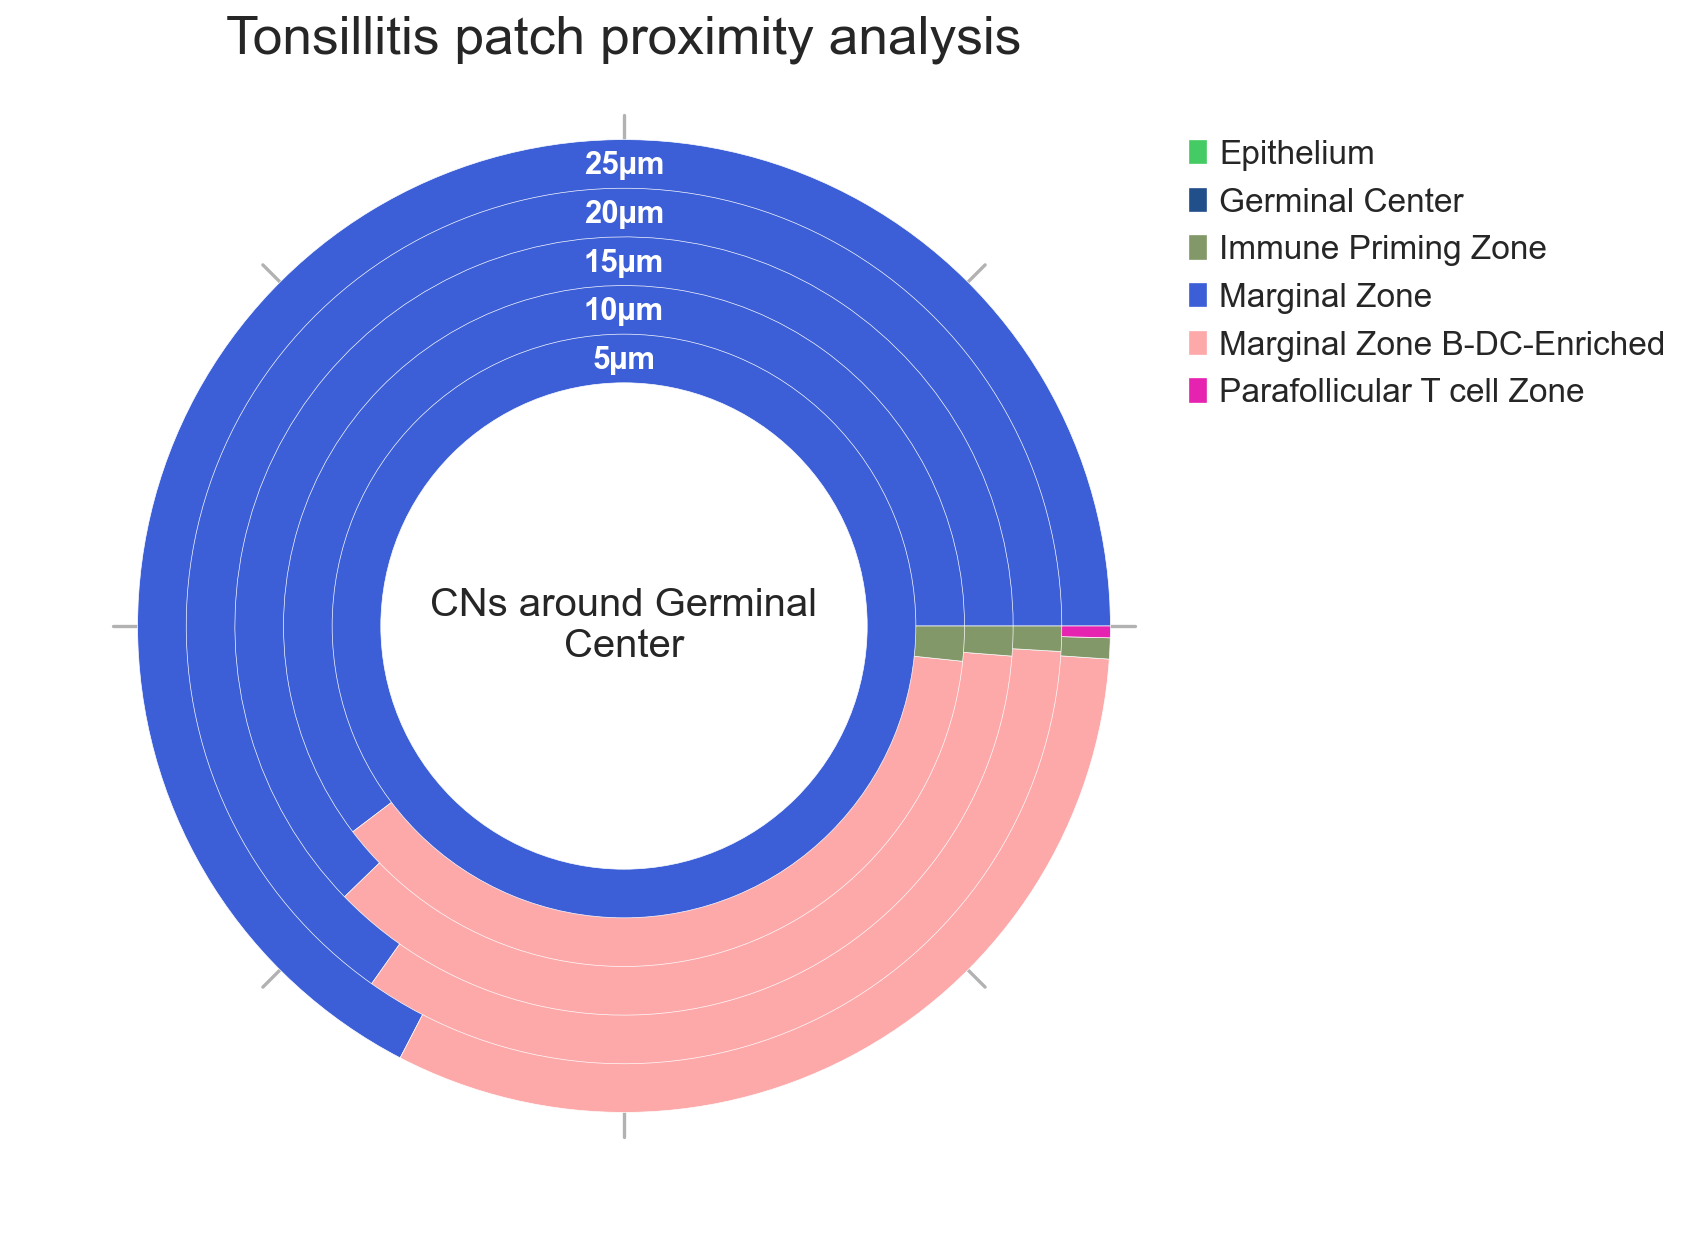

In [14]:
# Donut plots for CNs around Germinal Center
sp.pl.ppa_res_donut(adata, 
                palette=None,
                cat_col = "CN_k20_n6_annot",
                key_names = ['ppa_result_5', 'ppa_result_10', 'ppa_result_15', 'ppa_result_20', 'ppa_result_25'],
                radii = [5, 10, 15, 20, 25],
                unit = 'µm',
                figsize = (10,10),  
                add_guides = True,
                text = 'CNs around Germinal Center',
                label_color='white',
                subset_column = 'condition',
                subset_condition = 'tonsil',
                title='Tonsil patch proximity analysis')

sp.pl.ppa_res_donut(adata, 
                palette=None,
                cat_col = "CN_k20_n6_annot",
                key_names = ['ppa_result_5', 'ppa_result_10', 'ppa_result_15', 'ppa_result_20', 'ppa_result_25'],
                radii = [5, 10, 15, 20, 25],
                unit = 'µm',
                figsize = (10,10),  
                add_guides = True,
                text = 'CNs around Germinal Center',
                label_color='white',
                subset_column = 'condition',
                subset_condition = 'tonsillitis',
                title='Tonsillitis patch proximity analysis')